# Работа с Excel

Материалы:
* Макрушин С.В. Лекция 7: Работа с Excel
* https://docs.xlwings.org/en/stable/quickstart.html
* https://nbviewer.jupyter.org/github/pybokeh/jupyter_notebooks/blob/master/xlwings/Excel_Formatting.ipynb#search_text


## Задачи для совместного разбора

1. На листе "Рецептура" файла `себестоимостьА_в1.xlsx` для области "Пшеничный хлеб" рассчитать себестоимость всех видов продукции.

In [179]:
import pandas as pd
import xlwings as xw

wb = xw.Book(r'C:\Users\rikit\Downloads\себестоимостьА_в1.xlsx')
sht = wb.sheets['Рецептура']
bread1 = sht.range('G7').value * sht.range('G14').value + sht.range('H7').value * sht.range('H14').value + sht.range('I7').value * sht.range('I14').value + sht.range('J7').value * sht.range('J14').value + sht.range('K7').value * sht.range('K14').value + sht.range('L7').value * sht.range('L14').value + sht.range('M7').value * sht.range('M14').value
bread2 = sht.range('G8').value * sht.range('G14').value + sht.range('H8').value * sht.range('H14').value + sht.range('I8').value * sht.range('I14').value + sht.range('J8').value * sht.range('J14').value + sht.range('K8').value * sht.range('K14').value + sht.range('M8').value * sht.range('M14').value + sht.range('N8').value * sht.range('N14').value
bread3 = sht.range('G9').value * sht.range('G14').value + sht.range('H9').value * sht.range('H14').value + sht.range('I9').value * sht.range('I14').value + sht.range('K9').value * sht.range('K14').value + sht.range('L9').value * sht.range('L14').value + sht.range('N9').value * sht.range('N14').value + sht.range('O9').value * sht.range('O14').value
bread4 = sht.range('G10').value * sht.range('G14').value + sht.range('H10').value * sht.range('H14').value + sht.range('I10').value * sht.range('I14').value + sht.range('K10').value * sht.range('K14').value + sht.range('O10').value * sht.range('O14').value
spb = [float(bread1), float(bread2), float(bread3), float(bread4)]

print(spb)

[21.48, 16.525, 17.423000000000002, 18.085]


## Лабораторная работа 4.1

1. Загрузите данные из файлов `reviews_sample.csv` (__ЛР2__) и `recipes_sample.csv` (__ЛР5__) в виде `pd.DataFrame`. Обратите внимание на корректное считывание столбца(ов) с индексами. Оставьте в таблице с рецептами следующие столбцы: `id`, `name`, `minutes`, `submitted`, `description`, `n_ingredients`

In [180]:
#1 Задание
import csv
import numpy as np
import pandas as pd
review = pd.read_csv(r'C:\Users\rikit\Downloads\reviews_sample.csv', delimiter=",",index_col="Unnamed: 0")
recipe = pd.read_csv(r'C:\Users\rikit\Downloads\recipes_sample.csv', delimiter=',')
#review.index = review['Unnamed: 0']
recipe = recipe.drop(columns=['contributor_id', 'n_steps'])

recipe

,name,id,minutes,submitted,description,n_ingredients
0,george s at the cove black bean soup,44123,90,2002-10-25,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,2003-07-26,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,2002-08-29,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,2002-07-27,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,2004-02-23,i think a fondue is a very romantic casual din...,NaN
...,...,...,...,...,...,...
29995,zurie s holey rustic olive and cheddar bread,267661,80,2007-11-25,this is based on a french recipe but i changed...,10.0
29996,zwetschgenkuchen bavarian plum cake,386977,240,2009-08-24,"this is a traditional fresh plum cake, thought...",11.0
29997,zwiebelkuchen southwest german onion cake,103312,75,2004-11-03,this is a traditional late summer early fall s...,NaN
29998,zydeco soup,486161,60,2012-08-29,this is a delicious soup that i originally fou...,NaN


2. Случайным образом выберите 5% строк из каждой таблицы и сохраните две таблицы на разные листы в один файл `recipes.xlsx`. Дайте листам названия "Рецепты" и "Отзывы", соответствующие содержанию таблиц. 

In [181]:
exc1= 'recipes.xlsx'
rec1 = recipe.sample(frac = 0.05)
rev1 = review.sample(frac = 0.05)
with pd.ExcelWriter('recipes.xlsx') as exc1:
    rec1.to_excel(exc1, sheet_name='Рецепты')
    rev1.to_excel(exc1, sheet_name='Отзывы')
#recipe_ex = xw.Book('recipes.xlsx')
#pd.read_excel('recipes.xlsx')  

3. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_assign`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи присваивания массива значений диапазону ячеек.

In [185]:
recipe_ex = xw.Book('recipes.xlsx')
re_sht = recipe_ex.sheets['Рецепты']
re_sht.range('H1').value='seconds_assign' #название столбца
re_sht.range('H2:H1501').options(transpose=True).value = (rec1['minutes'] * 60).to_numpy()


4. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_formula`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи формул Excel.

In [186]:
import xlwings as xw
recipe_ex = xw.Book('recipes.xlsx')
re_sht = recipe_ex.sheets['Рецепты']
re_sht.range('I1').value='seconds_formula'
xw.Range('I2:I1501').formula = re_sht.range('I2').formula = f'=D2*60'

5. Сделайте названия всех добавленных столбцов полужирными и выровняйте по центру ячейки.

In [187]:
import xlwings as xw
recipe_ex = xw.Book('recipes.xlsx')
re_sht = recipe_ex.sheets['Рецепты']
re_sht.range('H1').api.Font.Bold = True
re_sht.range('I1').api.Font.Bold = True
re_sht.range('H1').api.HorizontalAlignment = xw.constants.HAlign.xlHAlignCenter
re_sht.range('I1').api.HorizontalAlignment = xw.constants.HAlign.xlHAlignCenter

6. Раскрасьте ячейки столбца `minutes` в соответствии со следующим правилом: если рецепт выполняется быстрее 5 минут, то цвет - зеленый; от 5 до 10 минут - жёлтый; и больше 10 - красный.

In [247]:
import xlwings as xw
green =  (5, 255, 0) #красный, зелёный, синий
yellow = (255, 255, 0)
red =  (255, 0, 0)
recipe_ex = xw.Book('recipes.xlsx')
re_sht = recipe_ex.sheets['Рецепты']
minut = re_sht.range("D2:D1501").value
for i in range(len(minut)):
    if minut[i] < 5:
        re_sht.range(f'D{i+2}').color = green
    elif minut[i] >= 5 and minut[i] <= 10:
        re_sht.range(f'D{i+2}').color = yellow
    else:
        re_sht.range(f'D{i+2}').color = red

7. Добавьте на лист `Рецепты`  столбец `n_reviews`, содержащий кол-во отзывов для этого рецепта. Выполните задание при помощи формул Excel.

In [250]:
import xlwings as xw
recipe_ex = xw.Book('recipes.xlsx')
re_sht = recipe_ex.sheets['Рецепты']
re_sht.range('J1').value='n_reviews'
xw.Range("J2:J1501").formula = re_sht.range('J2').formula = f'=COUNTIF(Отзывы!$C$2:$C${len(rev1)},C2'

## Лабораторная работа 4.2

8. Напишите функцию `validate()`, которая проверяет соответствие всех строк из листа `Отзывы` следующим правилам:
    * Рейтинг - это число от 0 до 5 включительно
    * Соответствующий рецепт имеется на листе `Рецепты`
    
В случае несоответствия этим правилам, выделите строку красным цветом

In [232]:
import xlwings as xw
recipe_ex = xw.Book('recipes.xlsx')
re_sht1 = recipe_ex.sheets['Рецепты']
re_sht2 = recipe_ex.sheets['Отзывы']
red =  (255, 0, 0)
recept_id = re_sht1.range("C2:C1501").value
otzovi_id = re_sht2.range("C2:C1501").value
rating = re_sht2.range("E2:E1501").value

for v in range(len(otzovi_id)):
    if otzovi_id[v] in recept_id and rating[v] >=0 and rating[v] <= 5:
        pass
    else:
        re_sht2.range(f'A{v+2}:F{v+2}').color = red

"for j in range(len(rating)):\n    if rating[j] >=0 and rating[j] <= 5:\n        re_sht.range(f'{j+2}').color = red"

9. В файле `recipes_model.csv` находится модель данных предметной области "рецепты". При помощи пакета `csv` считайте эти данные. При помощи пакета `xlwings` запишите данные на лист `Модель` книги `recipes_model.xlsx`, начиная с ячейки `A2`, не используя циклы. Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука. 

In [208]:
import csv
import xlwings as xw
import pandas as pd
recipe_ex = xw.Book('recipes.xlsx')
recipe_ex.sheets.add('Модель')
re_sht3 = recipe_ex.sheets['Модель']
#rec_model = pd.read_csv(r'C:\Users\rikit\Downloads\recipes_model.csv', delimiter="\t")
rem1 = rec_model.sample(frac = 1)


In [245]:
import csv
import xlwings as xw
import pandas as pd
with open(r'C:\Users\rikit\Downloads\recipes_model.csv', encoding = 'utf-8-sig') as f:
    sp1 = []
    t = csv.reader(f, delimiter='\t')
    for i in t:
        sp1.append(i)
sp1 = pd.DataFrame(sp1, columns=['', '', '', '', '', '', '', '', ''])
sp1

,,,,,,,,,
0,recipe,name,varchar(100),Y,Рецепт,Название рецепта,,,
1,recipe,id,serial,N,Рецепт,ID рецепта,PK,,
2,recipe,minutes,int,Y,Рецепт,Длительность выполнения в минутах,,,
3,recipe,contributor_id,int,Y,Рецепт,ID автора рецепта,FK,user,id
4,recipe,submitted,timestamp,Y,Рецепт,Дата добавления,,,
5,recipe,n_steps,int,N,Рецепт,Кол-во шагов рецепта,,,
6,recipe,description,text,N,Рецепт,Описание рецепта,,,
7,recipe,n_ingredients,int,N,Рецепт,Кол-во ингредиентов в рецепта,,,
8,review,id,serial,Y,Отзыв,ID отзыва,PK,,
9,review,user_id,int,Y,Отзыв,ID автора отзыва,FK,,


In [246]:
import csv
import xlwings as xw
import pandas as pd
#rec_model = pd.read_csv(r'C:\Users\rikit\Downloads\recipes_model.csv', delimiter="\t")
        
exc1= 'recipes.xlsx'
rec1 = recipe.sample(frac = 0.05)
rev1 = review.sample(frac = 0.05)
with pd.ExcelWriter('recipes.xlsx') as exc1:
    rec1.to_excel(exc1, sheet_name='Рецепты')
    rev1.to_excel(exc1, sheet_name='Отзывы')
    sp1.to_excel(exc1, sheet_name='Модель')

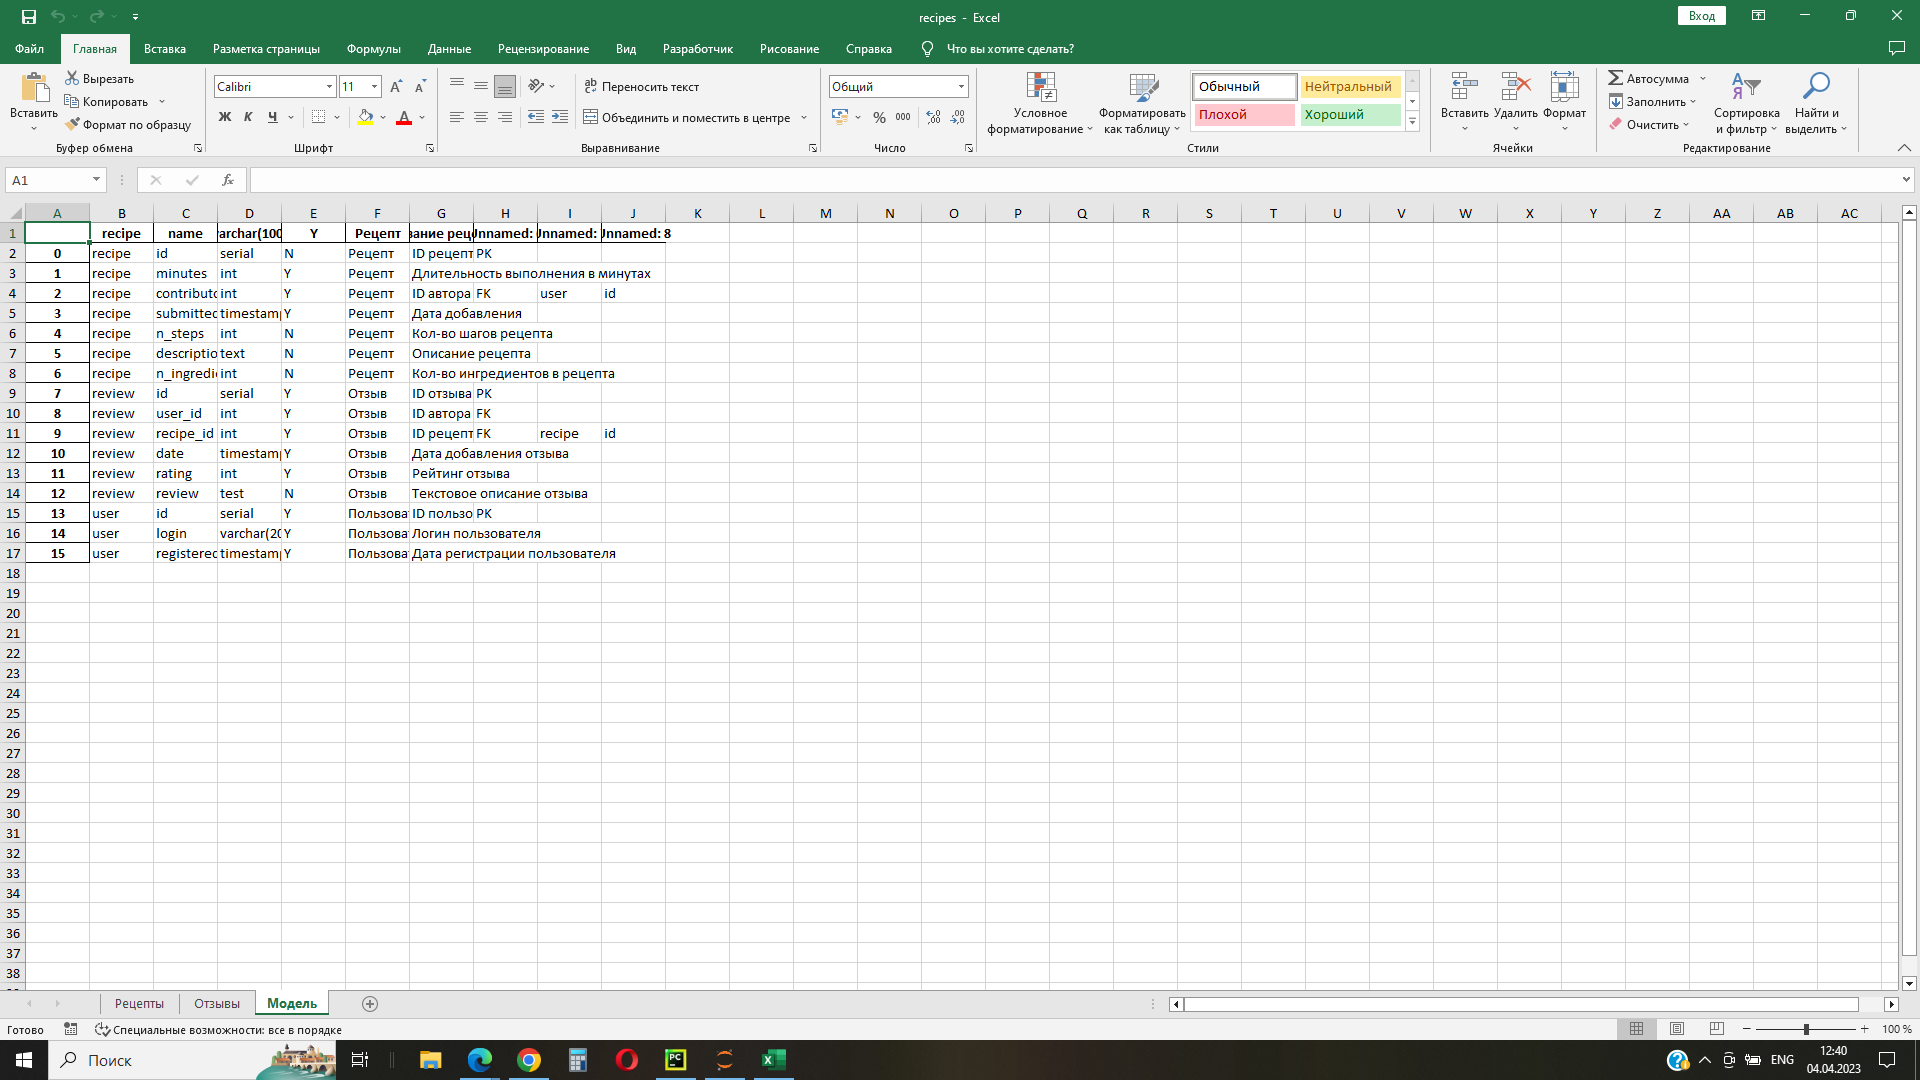

10. При помощи пакета `xlwings` добавьте в столбец J формулу для описания столбца на языке SQL. Формула должна реализовывать следующую логику:

    1\. в начале строки идут значения из столбцов В и C (значение столбца С приведено к верхнему регистру), разделенные пробелом
    
    2\. далее идут слова на основе столбца "Ключ"
        2.1 если в столбце "Ключ" указано значение "PK", то дальше через пробел идет ключевое слово "PRIMARY KEY"
        2.2 если в столбце "Ключ" указано значение "FK", то дальше через пробел идет ключевое слово "REFERENCES", затем значения столбцов H и I в формате "название_таблицы(название_столбца)"
        
    3\. если в столбце "Обязательно к заполнению" указано значение "Y" и в столбце "Ключ" указано не "PK", то дальше через пробел идет ключевое слово "NOT NULL".

Заполните этой формулой необходимое количество строк, используя "протягивание". Количество строк для протягивания определите на основе данных.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [226]:
import xlwings as xw
import pandas as pd
recipe_ex = xw.Book('recipes.xlsx')
sheet = recipe_ex.sheets['Модель']
for i in range(2, sheet.range("B" + str(sheet.cells.last_cell.row)).end("up").row + 1):
    # собираем значения из столбцов В и С
    b_value = sheet.range("B" + str(i)).value
    c_value = sheet.range("C" + str(i)).value.upper()
    # собираем слова на основе столбца "Ключ"
    key_value = str(sheet.range("H" + str(i)).value)
    words = []
    if key_value == "PK":
        words.append("PRIMARY KEY")
    elif key_value == "FK":
        words.append("REFERENCES")
        words.append(str(sheet.range("H" + str(i)).value) + "(" + str(sheet.range("I" + str(i)).value) + ")")
    # если в столбце "Обязательно к заполнению" указано значение "Y"
    if sheet.range("E" + str(i)).value == "Y" and key_value != "PK":
        words.append("NOT NULL")
    # формируем и записываем формулу в ячейку столбца J
    formula = "=".join([b_value, c_value] + words)
    sheet.range("J" + str(i)).value = formula

11. При помощи пакета `xlwings` измените стилизацию листа `Модель`.
* для заголовков добавьте заливку цвета `00ccff`
* примените автоподбор ширины столбца;
* сделайте шрифт заголовков полужирным;
* добавьте таблице автофильтр.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [225]:
import xlwings as xw
import pandas as pd
recipe_ex = xw.Book('recipes.xlsx')
re_sht3 = recipe_ex.sheets['Модель']
colour1 = (0,204,255)
re_sht3.range('B1:J1').color = colour1
re_sht3.range('B1:J1').columns.autofit()
re_sht3.range('B1:J1').api.Font.Bold = True
re_sht3.range('B1:J1').show_autofilter = True

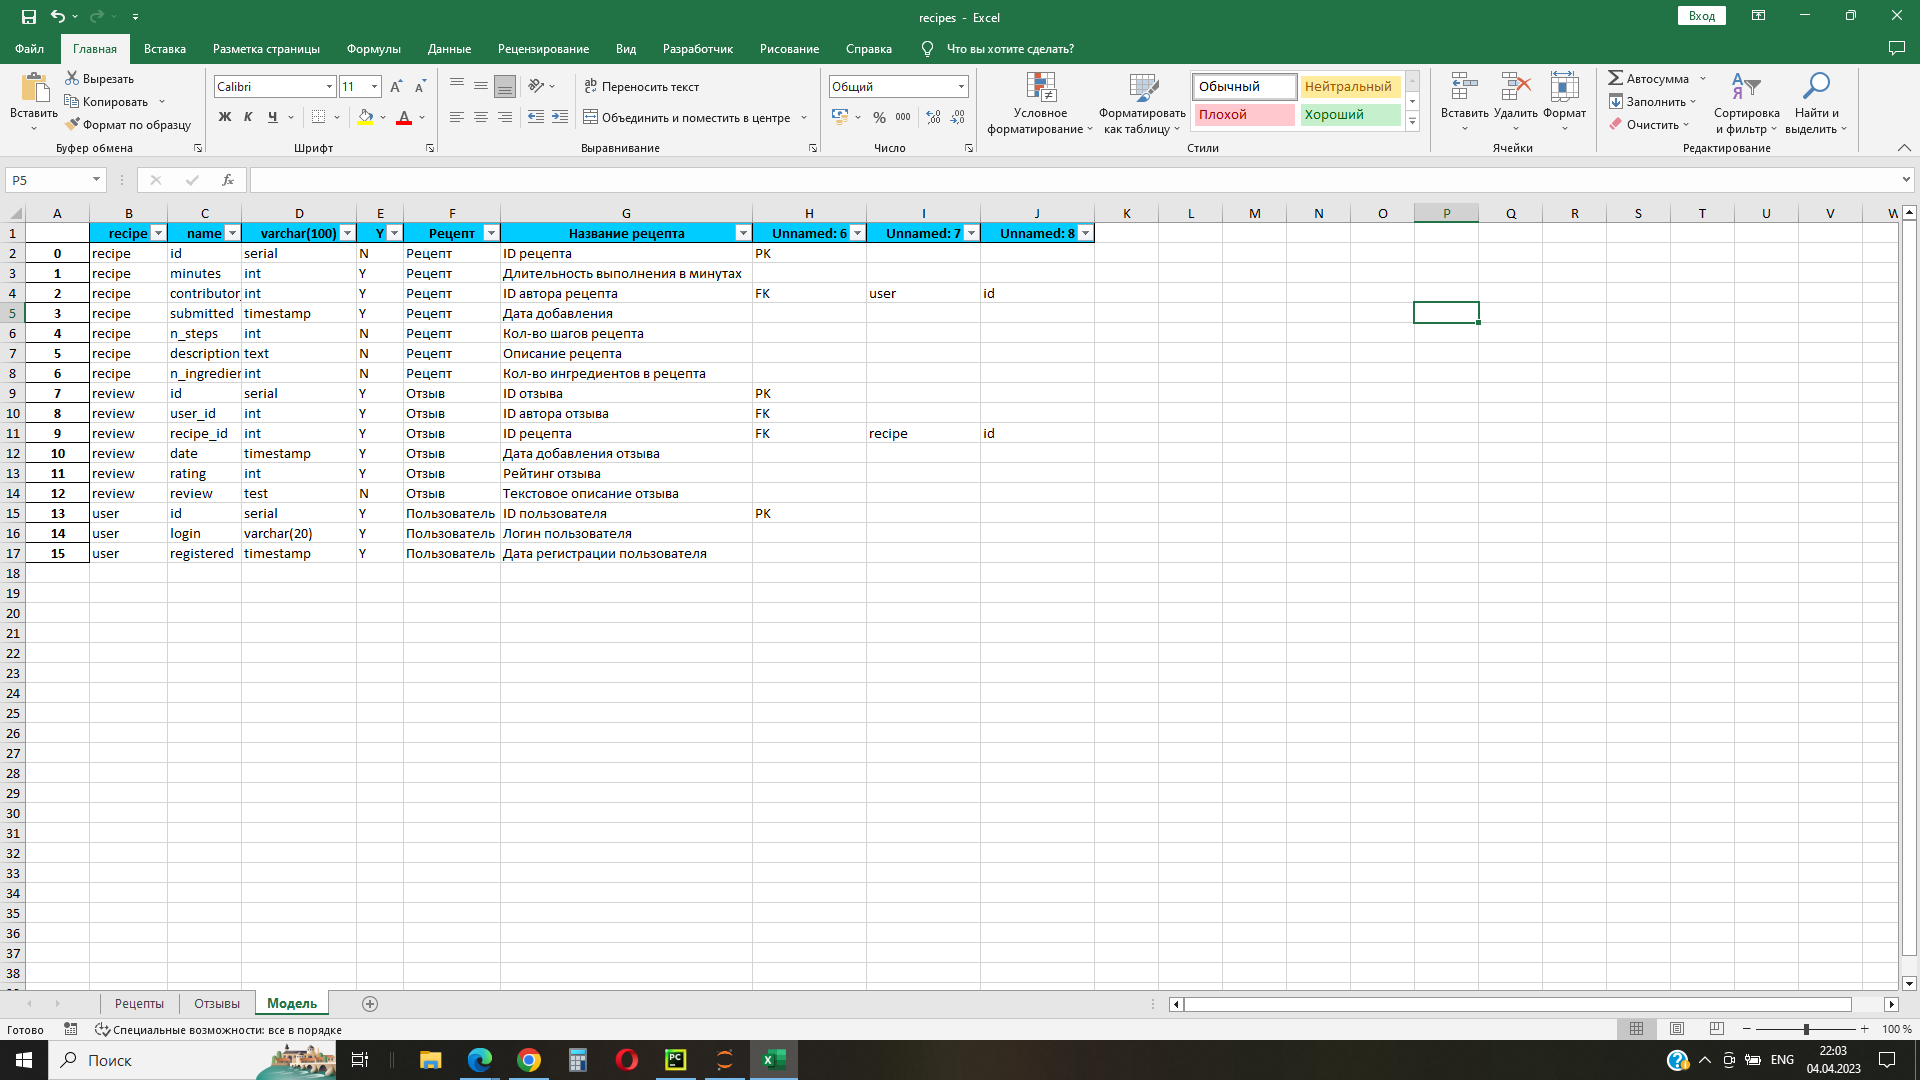

12. Посчитайте количество атрибутов для каждой из сущностей. Создайте лист `Статистика` и запишите в него результат группировки, начиная с ячейки "А1". Визуализируйте полученный результат при помощи столбчатой диаграммы. Сохраните полученную визуализацию на лист `Статистика`, начиная с ячейки "E2".  Сделайте скриншот листа `Статистика` и прикрепите в ячейку ноутбука.

* Вы можете воспользоваться методами для визуализации, которые поставляются вместе с объектами `pandas` (см. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot) 

In [ ]:
#что такое сущности